<a href="https://colab.research.google.com/github/Teejardni/data-science-prac/blob/main/PokemonPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import cm


Sample Dataset

In [11]:
!curl -L -o ~/content/complete-pokemon-dataset-gen-iiv.zip https://www.kaggle.com/api/v1/datasets/download/brdata/complete-pokemon-dataset-gen-iiv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  131k  100  131k    0     0   242k      0 --:--:-- --:--:-- --:--:--  242k


In [18]:
!unzip -d pokemon complete-pokemon-dataset-gen-iiv.zip

Archive:  complete-pokemon-dataset-gen-iiv.zip
  inflating: pokemon/PokeStats.csv   
  inflating: pokemon/Pokedex_Cleaned.csv  
  inflating: pokemon/Pokedex_Cleaned.xlsx  


In [42]:
df = pd.read_csv('pokemon/Pokedex_Cleaned.csv', encoding="latin1")

df.head()

,#,Name,Primary Type,Secondary Type,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Variant
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,NaN
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,NaN
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,NaN
3,3,Venusaur,Grass,Poison,625,80,100,123,122,120,80,NaN
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,NaN


In [44]:
poke_df = df.iloc[: , 1:11]
poke_df.head()

,Name,Primary Type,Secondary Type,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80
3,Venusaur,Grass,Poison,625,80,100,123,122,120,80
4,Charmander,Fire,NaN,309,39,52,43,60,50,65


Data Preprocessing

In [46]:
stats_df = poke_df[["HP","Attack","Defense","Sp.Atk","Sp.Def","Speed"]].values
# Standardize the data (mean=0, standard deviation=1)

scaler = StandardScaler()
stats_scaled = scaler.fit_transform(stats_df)

print("\nAfter standardization:")
print("Mean of each feature:", stats_scaled.mean(axis=0).round(3))
print("Std of each feature:", stats_scaled.std(axis=0).round(3))


After standardization:
Mean of each feature: [-0.  0. -0.  0.  0.  0.]
Std of each feature: [1. 1. 1. 1. 1. 1.]


Perform PCA

In [47]:
# Apply PCA
pca = PCA(n_components=6)  # Keep all 6 components initially
X_pca = pca.fit_transform(stats_scaled)
explained = pca.explained_variance_ratio_

print("PCA Results:")
print("Explained variance ratio (per PC):")
for i, v in enumerate(explained, start=1):
    print(f"  PC{i}: {v:.3f}  (cumulative: {explained[:i].sum():.3f})")

print(f"\nTransformed data shape: {X_pca.shape}")

PCA Results:
Explained variance ratio (per PC):
  PC1: 0.461  (cumulative: 0.461)
  PC2: 0.182  (cumulative: 0.643)
  PC3: 0.135  (cumulative: 0.779)
  PC4: 0.108  (cumulative: 0.886)
  PC5: 0.070  (cumulative: 0.956)
  PC6: 0.044  (cumulative: 1.000)

Transformed data shape: (1173, 6)


Scree Plot (Explained Variance)

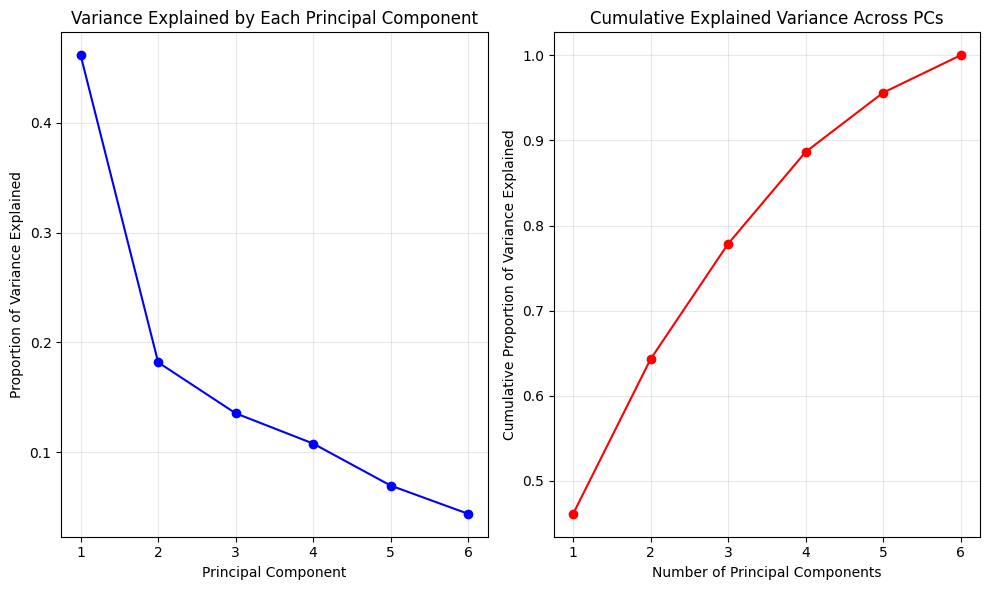

The first 2 principal components explain 64.3% of the variance.
The first 3 principal components explain 77.9% of the variance.


In [60]:
# Plot explained variance
plt.figure(figsize=(10, 6))

# Individual explained variance
plt.subplot(1, 2, 1)
plt.plot(np.arange(1, len(explained)+1), explained, marker='o', color='blue')
plt.xticks(np.arange(1, 7))
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Variance Explained by Each Principal Component')
plt.grid(alpha=0.3)

# Cumulative explained variance
plt.subplot(1, 2, 2)
plt.plot(np.arange(1, len(explained)+1), explained.cumsum(), marker='o', color='red')
plt.xticks(np.arange(1, 7))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.title('Cumulative Explained Variance Across PCs')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"The first 2 principal components explain {explained[:2].sum():.1%} of the variance.")
print(f"The first 3 principal components explain {explained[:3].sum():.1%} of the variance.")

Visualization 2 - Component Loadings Heatmap

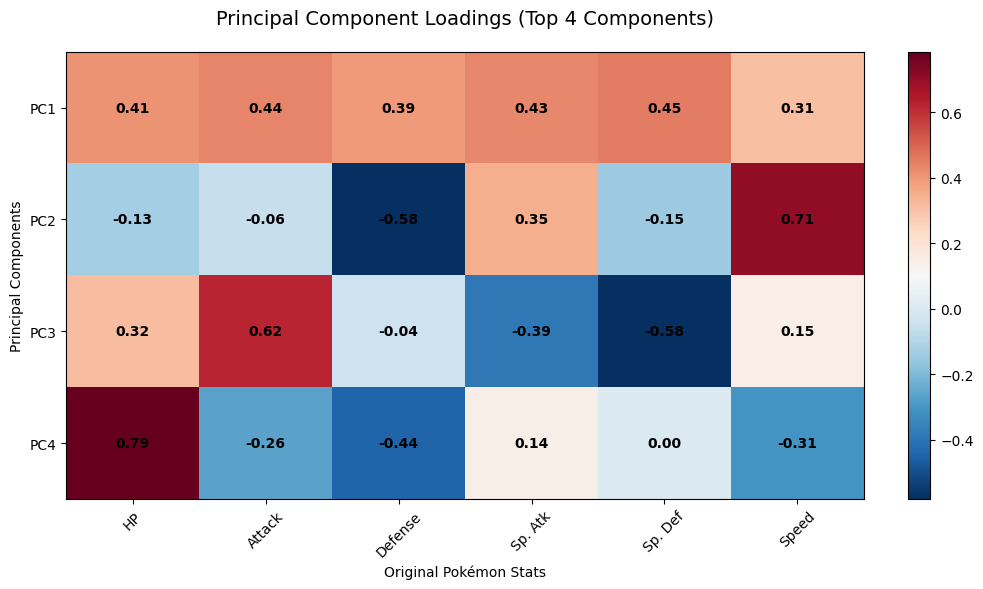

In [61]:
# Create loadings heatmap
components = pca.components_
feature_names = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(components[:4], aspect='auto', cmap='RdBu_r')  # Show first 4 components

# Set ticks and labels
ax.set_yticks(np.arange(4))
ax.set_yticklabels([f"PC{i+1}" for i in range(4)])
ax.set_xticks(np.arange(6))
ax.set_xticklabels(feature_names, rotation=45)

# Add colorbar
plt.colorbar(im, ax=ax, orientation='vertical', fraction=0.05)

# Add text annotations
for i in range(4):
    for j in range(6):
        text = ax.text(j, i, f'{components[i, j]:.2f}',
                      ha="center", va="center", color="black", fontweight='bold')

ax.set_title("Principal Component Loadings (Top 4 Components)", fontsize=14, pad=20)
ax.set_xlabel("Original Pokémon Stats")
ax.set_ylabel("Principal Components")

plt.tight_layout()
plt.show()

The loadings reveal clear patterns in how Pokémon stats vary. PC1 loads positively and fairly evenly on all six base stats, making it a measure of overall statistical strength—Pokémon with high PC1 scores tend to be stronger across the board, while those with low scores are generally weaker. PC2 contrasts Speed and Special Attack against Defense, separating fast but fragile sweepers from slower, defensive tanks. PC3 emphasizes Attack over Special Attack and Special Defense, capturing the distinction between physical and special-oriented Pokémon. Finally, PC4 is dominated by HP, highlighting Pokémon whose bulk is derived primarily from large health pools rather than defensive stats. Together, these components suggest that most Pokémon can be described along a few strategic axes: overall power, speed-versus-bulk, physical-versus-special orientation, and HP-driven durability.

Create Loadings DataFrame

In [52]:
loadings_df = pd.DataFrame(
    components.T,
    index=["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"],
    columns=[f"PC{i+1}" for i in range(6)]
)

print("PCA Component Loadings:")
print(loadings_df.round(3))

print("\nInterpretation:")
print("PC1 - Most positive loadings:", loadings_df['PC1'].nlargest(2).index.tolist())
print("PC1 - Most negative loadings:", loadings_df['PC1'].nsmallest(2).index.tolist())
print("PC2 - Most positive loadings:", loadings_df['PC2'].nlargest(2).index.tolist())
print("PC2 - Most negative loadings:", loadings_df['PC2'].nsmallest(2).index.tolist())

PCA Component Loadings:
           PC1    PC2    PC3    PC4    PC5    PC6
HP       0.410 -0.132  0.315  0.786 -0.235  0.205
Attack   0.438 -0.055  0.623 -0.265  0.308 -0.503
Defense  0.392 -0.577 -0.041 -0.445 -0.046  0.559
Sp. Atk  0.433  0.353 -0.389  0.143  0.689  0.203
Sp. Def  0.452 -0.148 -0.581  0.001 -0.376 -0.543
Speed    0.309  0.707  0.146 -0.307 -0.480  0.240

Interpretation:
PC1 - Most positive loadings: ['Sp. Def', 'Attack']
PC1 - Most negative loadings: ['Speed', 'Defense']
PC2 - Most positive loadings: ['Speed', 'Sp. Atk']
PC2 - Most negative loadings: ['Defense', 'Sp. Def']


 Visualization 3 - PC1 vs PC2 Scatter Plot

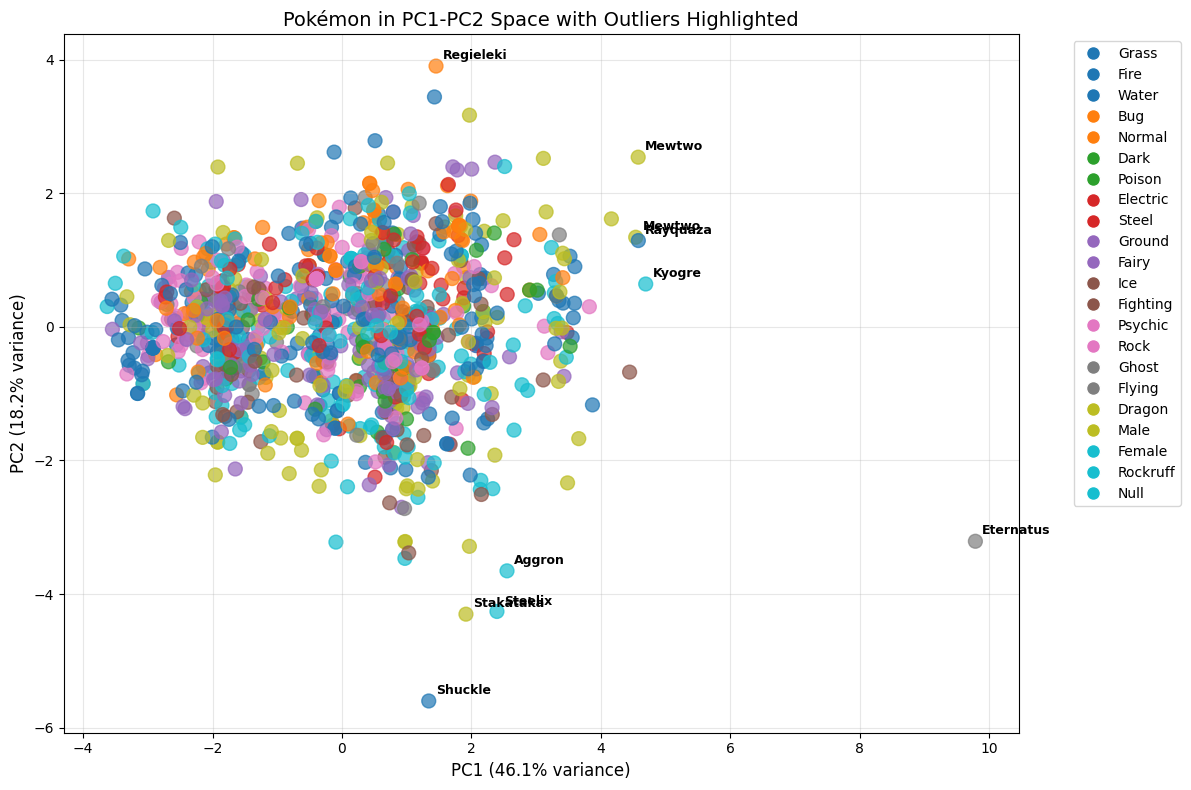

In [68]:
# Create scatter plot of PC1 vs PC2, colored by type
types = df["Primary Type"].astype('category')
type_codes = types.cat.codes.values
unique_types = df["Primary Type"].unique()

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], s=100, c=type_codes, cmap='tab10', alpha=0.7)

# Identify extreme outliers (e.g., top 5 largest absolute values in PC1 and PC2)
num_outliers_to_show = 5
pc1_outliers_indices = np.argsort(np.abs(X_pca[:, 0]))[::-1][:num_outliers_to_show]
pc2_outliers_indices = np.argsort(np.abs(X_pca[:, 1]))[::-1][:num_outliers_to_show]
outlier_indices = np.unique(np.concatenate((pc1_outliers_indices, pc2_outliers_indices)))


# Add Pokémon names as labels for outliers
for i in outlier_indices:
    plt.annotate(df["Name"].iloc[i], (X_pca[i,0], X_pca[i,1]),
                xytext=(5, 5), textcoords='offset points',
                fontsize=9, ha='left', color='black', weight='bold')


plt.xlabel(f"PC1 ({explained[0]:.1%} variance)", fontsize=12)
plt.ylabel(f"PC2 ({explained[1]:.1%} variance)", fontsize=12)
plt.title("Pokémon in PC1-PC2 Space with Outliers Highlighted", fontsize=14)
plt.grid(alpha=0.3)

# Create custom legend for types
legend_elements = []
cmap = plt.get_cmap('tab10', len(unique_types)) # Get the colormap with the correct number of colors
for i, ptype in enumerate(unique_types):
    legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label=ptype,
                                      markerfacecolor=cmap(i), markersize=10))

plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout()
plt.show()

 Analysis Summary

In [59]:
# === PCA ANALYSIS SUMMARY ===
print("=== PCA ANALYSIS SUMMARY ===")
print(f"Dataset size: {len(df)} Pokémon (each with 6 base stats)")
print(f"Variance explained by first 2 PCs: {explained[:2].sum():.1%}")
print(f"Variance explained by first 3 PCs: {explained[:3].sum():.1%}")

print("\nInterpretation of Principal Components:")
print("- PC1 primarily reflects overall statistical strength (general power across stats).")
print("- PC2 captures the contrast between physical attributes (Attack/Defense) "
      "and special attributes (Sp. Atk/Sp. Def).")
print("- PC3 adds nuance, often separating Speed-oriented Pokémon from bulkier ones.")
print("- Pokémon of similar types tend to cluster within the same regions of the PC space.")

# Attach PCA scores back to the dataset
pca_results = df.copy()
for i in range(6):
    pca_results[f'PC{i+1}'] = X_pca[:, i]

print("\nPreview of dataset with PCA scores:")
print(pca_results[['Name', 'Primary Type','Secondary Type', 'PC1', 'PC2', 'PC3']])


=== PCA ANALYSIS SUMMARY ===
Dataset size: 1173 Pokémon (each with 6 base stats)
Variance explained by first 2 PCs: 64.3%
Variance explained by first 3 PCs: 77.9%

Interpretation of Principal Components:
- PC1 primarily reflects overall statistical strength (general power across stats).
- PC2 captures the contrast between physical attributes (Attack/Defense) and special attributes (Sp. Atk/Sp. Def).
- PC3 adds nuance, often separating Speed-oriented Pokémon from bulkier ones.
- Pokémon of similar types tend to cluster within the same regions of the PC space.

Preview of dataset with PCA scores:
              Name Primary Type Secondary Type       PC1       PC2       PC3
0        Bulbasaur        Grass         Poison -1.616868  0.048871 -0.765499
1          Ivysaur        Grass         Poison -0.428376  0.127420 -0.779599
2         Venusaur        Grass         Poison  1.209715  0.202478 -0.748363
3         Venusaur        Grass         Poison  2.589581 -0.448603 -1.140400
4       Charm